# Lecture 16 - Revision

Today, we put everything we have learned together and perform a _full analysis of a dataset_. While you still need to download the dataset file `heart.csv` from Blackboard, unlike in the previous lectures and workshops, this file has in _no way been adapted from the original_ (accessible [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29)).

We analyse the dataset in the following steps:
- [The dataset](#The-dataset)
    - [Loading](#Loading)
    - [Missing values](#Missing-values)
    - [Preparation](#Preparation)
- [Analysis](#Analysis)
    - [Categorical features](#Categorical-features)
    - [Numerical features](#Numerical-features)
    - [Removing features](#Removing-features)
    - [Visually comparing distributions](#Visually-preparing-distributions)
- [Classification](#Classification)
    - [Selecting the data](#Selecting-the-data)
    - [Splitting the data](#Splitting-the-data)
    - [Training the classifiers](#Trainig-the-classifiers)
    - [Model evaluation](#Model-evaluation)

## The dataset

The (anonymised) dataset we are dealing with today concerns the presence or absence of heart desease. It contains the following features, with the last column representing the class:

| Column      | Feature     | Type |
| ----------- | ----------- | -----|
| 0           | age         | numerical (real-valued) |
| 1           | sex         | binary (0 or 1) |
| 2           | chest pain type         | cardinal (4 values) |
| 3           | resting blood pressure  | numerical  (real-valued) |
| 4           | serum cholesterol in mg/dl    | numerical (real-valued) |
| 5           | fasting blood sugar > 120 mg/dl    | binary (0 or 1) |
| 6           | resting electrocardiographic results    | cardinal (3 values) |
| 7           | maximum heart rate achieved    | numerical (real-valued) |
| 8           | exercise induced angina    | binary (0 or 1) |
| 9           | oldpeak = ST depression induced by exercise relative to rest | numerical (real-valued) |
| 10          | the slope of the peak exercise ST segment     | ordinal |
| 11          | number of major vessels colored by flourosopy      | ordinal (0-3)|
| 12          | thal      | cardinal ( 3 = normal; 6 = fixed defect; 7 = reversable defect )|
| 13          | heart desease | class: 1 = absence, 2 = presence |

### Loading

Let us first load the dataset with `pandas` (and the function [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) to examine what we have.

_Note:_ If you look at the dataset file itself, you will see that the entries are _space-separated_ rather than _comma-separated_. We can handle this by passing `sep = ' '` argument to the [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.

In [1]:
import pandas as pd

heart_df = pd.read_csv('heart.csv', sep = ' ', header = None)

heart_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


### Missing values

Before doing anything with the data, let us check whether any values are missing from the dataset. For datasets with missing values, we need to decide how to handle that (based on the amount of the missing values and the size of our dataset).

Here, we use two different ways to check that:
- [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) summarises the information about the `DataFrame`
- [`pandas.DataFrame.isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) (this will tell us, for every location in the `DataFrame`, whether it is missing or not) in combination with [`pandas.DataFrame.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) (to display the totals of missing values per column)

In [2]:
print(heart_df.info())
heart_df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       270 non-null    float64
 1   1       270 non-null    float64
 2   2       270 non-null    float64
 3   3       270 non-null    float64
 4   4       270 non-null    float64
 5   5       270 non-null    float64
 6   6       270 non-null    float64
 7   7       270 non-null    float64
 8   8       270 non-null    float64
 9   9       270 non-null    float64
 10  10      270 non-null    float64
 11  11      270 non-null    float64
 12  12      270 non-null    float64
 13  13      270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB
None


0

Fortunately, this dataset has no missing values!

### Preparation

Next, to make it easier to understand what we are doing, let us add some names to our columns. We will assign these based on the dataset description provided by the authors:

In [3]:
heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
                   'serum_cholesterol', 'fasting_blood_sugar', 'ECG', 'max_heart_rate',
                   'exercise_angina', 'oldpeak', 'slope_exercise_ST', 'coloured_vessels',
                   'thal', 'heart_desease']

display(heart_df)

display(heart_df.chest_pain_type)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,ECG,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,thal,heart_desease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


0      4.0
1      3.0
2      2.0
3      4.0
4      2.0
      ... 
265    3.0
266    2.0
267    2.0
268    4.0
269    4.0
Name: chest_pain_type, Length: 270, dtype: float64

While we are studying the dataset, it might also be useful to replace some of the nominal features with their actual values. For example, we know that:
- in the `sex` column, `0` stands for _male_ and `1` for _female_; 
- in the `thal` column, 3 stands for the _normal_ condition, 6 stands for the presence of a _fixed defect_ and 7 stands for a presence of a _reversible defect_.

We can use [`pandas.DataFrame.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to replace these values:

In [4]:
heart_df.sex.replace([0, 1], ['male', 'female'], inplace = True)
heart_df.thal.replace([3, 6, 7], ['normal', 'fixed', 'reversable'], inplace = True)
display(heart_df)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,ECG,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,thal,heart_desease
0,70.0,female,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,2
1,67.0,male,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable,1
2,57.0,female,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable,2
3,64.0,female,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable,1
4,74.0,male,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,female,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,reversable,1
266,44.0,female,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,reversable,1
267,56.0,male,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,normal,1
268,57.0,female,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,fixed,1


Further, based on the dataset description we can see that the following attributes are actually categorical (i.e. the numerical values just encode different "types of stuff", rather than having a numerical interpretation):
- chest pain type
- resting electrocardiographic results
- fasting blood sugar
- exercise angina

In our current dataframe, these are encoded not only as _numbers_, but also as _floats_. While from the data perspective, it does not matter if our category types are `1.0` and `0.0` or `1` and `0`, the latter is more human-readable. So, to "get rid" of the `.0` part, we will first cast these columns into an integer `int64` type, and then into the `category` type.

Finally, we can also see that our _coloured vessels_ is an _ordinal_ value. This means that the value of `2` _is actually higher_ than the value of `0` (unlike with e.g. _chest pain type_, which only characterises different _types_ of pain, not their strength). So, we will leave it as numerical, but represent it as an `int64` (as there will never be `2.3` coloured vessels).

For changing the types of [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) we can use [`pandas.Series.astype()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html) and then re-assign it to the original [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [5]:
heart_df.chest_pain_type = heart_df.chest_pain_type.astype('int64').astype('category')
heart_df.ECG = heart_df.ECG.astype('int64').astype('category')
heart_df.fasting_blood_sugar = heart_df.fasting_blood_sugar.astype('int64').astype('category')
heart_df['exercise_angina'] = heart_df['exercise_angina'].astype('int64').astype('category')
heart_df['coloured_vessels'] = heart_df['coloured_vessels'].astype('int64')
display(heart_df)
heart_df.info()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,ECG,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,thal,heart_desease
0,70.0,female,4,130.0,322.0,0,2,109.0,0,2.4,2.0,3,normal,2
1,67.0,male,3,115.0,564.0,0,2,160.0,0,1.6,2.0,0,reversable,1
2,57.0,female,2,124.0,261.0,0,0,141.0,0,0.3,1.0,0,reversable,2
3,64.0,female,4,128.0,263.0,0,0,105.0,1,0.2,2.0,1,reversable,1
4,74.0,male,2,120.0,269.0,0,2,121.0,1,0.2,1.0,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,female,3,172.0,199.0,1,0,162.0,0,0.5,1.0,0,reversable,1
266,44.0,female,2,120.0,263.0,0,0,173.0,0,0.0,1.0,0,reversable,1
267,56.0,male,2,140.0,294.0,0,2,153.0,0,1.3,2.0,0,normal,1
268,57.0,female,4,140.0,192.0,0,0,148.0,0,0.4,2.0,0,fixed,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     270 non-null    float64 
 1   sex                     270 non-null    object  
 2   chest_pain_type         270 non-null    category
 3   resting_blood_pressure  270 non-null    float64 
 4   serum_cholesterol       270 non-null    float64 
 5   fasting_blood_sugar     270 non-null    category
 6   ECG                     270 non-null    category
 7   max_heart_rate          270 non-null    float64 
 8   exercise_angina         270 non-null    category
 9   oldpeak                 270 non-null    float64 
 10  slope_exercise_ST       270 non-null    float64 
 11  coloured_vessels        270 non-null    int64   
 12  thal                    270 non-null    object  
 13  heart_desease           270 non-null    int64   
dtypes: category(4), float64(6)

## Analysis
Let us now analyse the relationship between different features in the dataset.

### Categorical features

First, let us start with the categorical features. Here, we can ask questions such as _"Is the presence of heart desease independent of sex?"_

For all the combinations of categorical features from the dataset, we will check if they are likely to be independent. For this, we will use:
- [`pandas.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to calculate the cross-tabluation (frequency table, contingency table) between the two columns
- [`scipy.stats.chi2_contingency()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) applies chi-square test of independence from a contingency table. Resulting p-values < 0.05 mean that the features are not likely to be independent.

Remember, if the features are:
- **independent**: the distribution of one feature does not depend on the other; they can not be used to predict each other (e.g. the weather is independent of the day in the week)
- **not independent**: the distribution of one feature depends on the other; there is some correlation between the features (e.g. highest level of education achieved in adults is dependent on the gender)

In [6]:
from scipy import stats

categorical = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'ECG',
               'exercise_angina', 'coloured_vessels', 'thal', 'heart_desease']

for i, feat1 in enumerate(categorical[:-1]):
    for feat2 in categorical[i+1:]:
        crosstab = pd.crosstab(heart_df[feat1], heart_df[feat2])
        _, p, _, _ = stats.chi2_contingency(crosstab)
        if p < 0.05:
            relationship = 'not independent'
        else:
            relationship = 'independent'
        print("{} likely {} of {} (p-value = {})".format(feat1, relationship, feat2, p))
    print()

sex likely independent of chest_pain_type (p-value = 0.10947278040318617)
sex likely independent of fasting_blood_sugar (p-value = 0.6106566868716203)
sex likely independent of ECG (p-value = 0.09782182785681859)
sex likely not independent of exercise_angina (p-value = 0.0048091672327855856)
sex likely independent of coloured_vessels (p-value = 0.09114607784097477)
sex likely not independent of thal (p-value = 2.735084784204102e-10)
sex likely not independent of heart_desease (p-value = 1.9262256333560795e-06)

chest_pain_type likely independent of fasting_blood_sugar (p-value = 0.07084065472520731)
chest_pain_type likely independent of ECG (p-value = 0.10661143879321983)
chest_pain_type likely not independent of exercise_angina (p-value = 4.002612935444032e-11)
chest_pain_type likely not independent of coloured_vessels (p-value = 0.002824301009499279)
chest_pain_type likely not independent of thal (p-value = 1.479569740264237e-05)
chest_pain_type likely not independent of heart_deseas

The simplest way to look at the relationship between two categorical variables (i.e. the relationship between `sex` and the presence/absence of heart desease) is to simply look at the ratio of different categories (male/female, normal/fixed/reversible) for different classes:

In [7]:
print(heart_df.groupby(['sex']).heart_desease.value_counts(normalize=True))
print()
print(heart_df.groupby(['thal']).heart_desease.value_counts(normalize=True))

sex     heart_desease
female  2                0.546448
        1                0.453552
male    1                0.770115
        2                0.229885
Name: proportion, dtype: float64

thal        heart_desease
fixed       2                0.571429
            1                0.428571
normal      1                0.782895
            2                0.217105
reversable  2                0.759615
            1                0.240385
Name: proportion, dtype: float64


Here, we can see that (assuming our dataset is representative of the population), around half the female patients (55%) have heart desease, while only about a quarter (23%) of the male patients do.

Similarly, we can see that only 22% patients with a `normal` condition have heart desease, which rises to around 24% for patients with a reverable defect, and up to 43% for patients with a fixed defect.

### Numerical features

Next, let us see the relationship between our numerical features. Before we apply any statistical tests between the features, we first need to determine whether any of them come form a normal distribution.

To do this, for all our numerical features, we can use
- [`scipy.stats.shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) to perform the Shapiro-Wilk test, which tests for the null hypothesis that the samples are drawn from a normal distribution.

In [8]:
numerical = ['age', 'resting_blood_pressure', 'serum_cholesterol',
             'max_heart_rate', 'oldpeak', 'slope_exercise_ST']

for feat in numerical:
    p = stats.shapiro(heart_df[feat]).pvalue
    if p < 0.05:
        print("{} likely does not come from a normal distribution (p = {})".format(feat, p))
    else:
        print("{} likely comes from a normal distribution (p = {})".format(feat, p))

age likely does not come from a normal distribution (p = 0.02765394188463688)
resting_blood_pressure likely does not come from a normal distribution (p = 3.7402976431621937e-06)
serum_cholesterol likely does not come from a normal distribution (p = 1.0786085802294565e-08)
max_heart_rate likely does not come from a normal distribution (p = 0.00014500865654554218)
oldpeak likely does not come from a normal distribution (p = 2.102865382435444e-15)
slope_exercise_ST likely does not come from a normal distribution (p = 2.788822956233767e-20)


Now that we know our data is not normally distributed, we know which statistical test are appropriate to use going forther.

As this dataset is meant to be used to predict the presence and absence of heart desease, let us first see whether different numerical features have different distributions in the presence or absence of heart desease. The simplest way to check if the distributions differ is to check whether their _medians_ differ. To do this for each numerical feature, we will use:
- [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to perform calculations separately in the presence and the absence of heart desease
- [`pandas.core.groupby.GroupBy.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) to perform an arbitrary operation on the groups (in this case, we will just put all the values into a `list`)
- [`scipy.stats.kruskal()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html) to perform Kruskal-Walls H-test on the groups, which tests the hypothesis that the group medians are equal. If p-value < 0.05, it is likely not true that the medians are equal.

In [9]:
for feat in numerical:
    p = stats.kruskal(*heart_df.groupby('heart_desease')[feat].apply(list).values).pvalue
    if p < 0.05:
        print("{} medians are not equal in the presence and absence of heart desease (p={})".format(feat, p))
    else:
        print("{} medians may be equal in the presence and absence of heart desease (p={})".format(feat, p))

age medians are not equal in the presence and absence of heart desease (p=0.00020456289057420112)
resting_blood_pressure medians are not equal in the presence and absence of heart desease (p=0.03147853390983711)
serum_cholesterol medians are not equal in the presence and absence of heart desease (p=0.007682913135935691)
max_heart_rate medians are not equal in the presence and absence of heart desease (p=5.808955939602368e-12)
oldpeak medians are not equal in the presence and absence of heart desease (p=2.9633249080476525e-11)
slope_exercise_ST medians are not equal in the presence and absence of heart desease (p=2.575053375595596e-09)


### Removing features

Based on all the analysis performed so far, we can see that _most_ features are somewhat predictive of heart desease:
- In the case of our numerical features, their distributions differ in case of the presence and absence of heart desease.
- In the case of our categorical features, all except _fasting blood sugar_ are **not independet** of the presence of heart desease.

Since the _fasting blood sugar_ seems to be independent of the presence of heart desease (and in fact, many of our other features!), let us just remove it from further processing. We can do this by using [`pandas.DataFrame.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) with the argument `axis = 'columns'` to indicate that we are operating on the columns.

In [10]:
heart_df.drop('fasting_blood_sugar', axis = 'columns', inplace = True)
display(heart_df)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,ECG,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,thal,heart_desease
0,70.0,female,4,130.0,322.0,2,109.0,0,2.4,2.0,3,normal,2
1,67.0,male,3,115.0,564.0,2,160.0,0,1.6,2.0,0,reversable,1
2,57.0,female,2,124.0,261.0,0,141.0,0,0.3,1.0,0,reversable,2
3,64.0,female,4,128.0,263.0,0,105.0,1,0.2,2.0,1,reversable,1
4,74.0,male,2,120.0,269.0,2,121.0,1,0.2,1.0,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,female,3,172.0,199.0,0,162.0,0,0.5,1.0,0,reversable,1
266,44.0,female,2,120.0,263.0,0,173.0,0,0.0,1.0,0,reversable,1
267,56.0,male,2,140.0,294.0,2,153.0,0,1.3,2.0,0,normal,1
268,57.0,female,4,140.0,192.0,0,148.0,0,0.4,2.0,0,fixed,1


### Visually comparing distributions

For now, we looked into which categorical features are (not) independent, and whether the distribution of our numerical features does (or does not) change in the presence of heart desease. Instead of these yes/no descriptors, let us look into the relationship between some of the features in more detail.

We have already looked at the relationship between categorical features: we simply displayed the ratios of different classes for each feature.

Next, let us look into the relationships between pairs of numerical features. We will do this by _plotting the values visually_ , as well as attempting to _fit a linear regression_ (an approximating line) to the relationship between the two features.

For this, we are using:
- [`matplotlib.axes.Axes.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) to produce a scatter plot of the pair of features
- [`scipy.stats.linregress()`](https://www.google.com/search?channel=fs&client=ubuntu&q=scipy+stats+linregress) to fit a line to this data

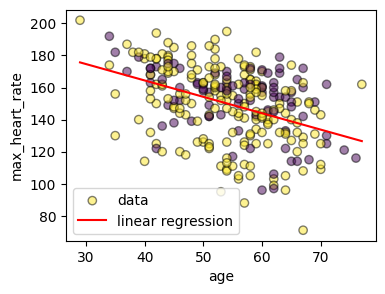

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

feat1 = 'age'
feat2 = 'max_heart_rate'

color = heart_df.sex.replace(['male', 'female'], [0, 1]).astype('int64')
#print(color)

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(heart_df[feat1], heart_df[feat2],
           alpha=0.5, edgecolor='black', label = 'data', c = color.values)

slope, intercept = np.polyfit(heart_df[feat1], heart_df[feat2], 1)

min_x = heart_df[feat1].min()
max_x = heart_df[feat1].max()
x = np.linspace(min_x, max_x, 100)

ax.plot(x, intercept + slope*x, 'r', label='linear regression')

ax.set_xlabel(feat1)
ax.set_ylabel(feat2)

ax.legend()

plt.show()

Now, let us look at individual numerical features (and their relation to the presence and absence of heart desease). For this, let us try and plot several versions of the histogram of this feature.

For this, we will use [`matplotlib.axes.Axes.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html).

First, let us just plot the distribution of a feature (e.g. `max heart rate`):

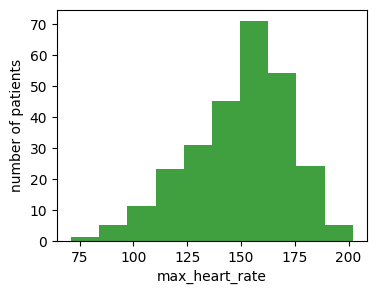

In [12]:
from matplotlib import pyplot as plt

feature = 'max_heart_rate'

fig, ax = plt.subplots(figsize=(4,3))

n, bins, patches = ax.hist(heart_df[feature], 10, density=False, facecolor='g', alpha=0.75)

ax.set_xlabel(feature)
ax.set_ylabel('number of patients')
    
plt.show()

Next, let us plot the same thing, but color each histogram bin according to the proportion of males and females. To do this, we will use:
- [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to perform calculations separately in the presence and the absence of heart desease
- [`pandas.core.groupby.GroupBy.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) to perform an arbitrary operation on the groups (in this case, we will just put all the values into a `list`, to plot it later)
- we will pase `stacked=True` argument to [`matplotlib.axes.Axes.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) to indicate we want to stack these columns

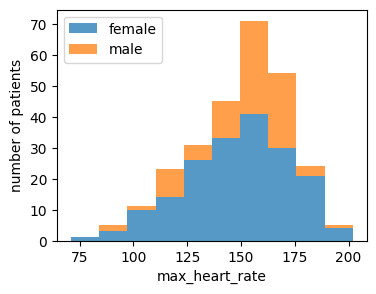

In [13]:
grouped = heart_df.groupby('sex')[feature].apply(list)
fig, ax = plt.subplots(figsize=(4,3))

n, bins, patches = ax.hist(grouped.values, bins=bins, stacked=True, density=False, alpha=0.75, label = grouped.index)

ax.set_xlabel(feature)
ax.set_ylabel('number of patients')
ax.legend()
plt.show()


Finally, let us look at the distribution of _max heart rate_ in the presence and absence of heart desease. We will again use [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) followed by [`pandas.core.groupby.GroupBy.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) (and then applying the `list` operator), however this time we will display the histograms side-by-side instead of stacked (`stacked=False`). We will also _normalise_ our histograms to display relative numbers of patients:

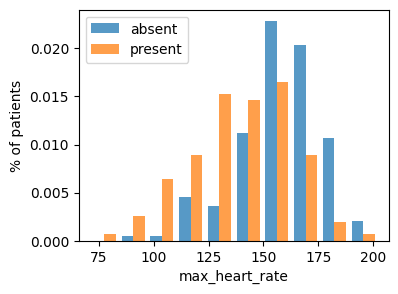

In [14]:
grouped = heart_df.groupby('heart_desease')[feature].apply(list)
fig, ax = plt.subplots(figsize=(4,3))

n, bins, patches = ax.hist(grouped.values, 10, stacked=False, density=True, alpha=0.75, label = ['absent', 'present'])

ax.set_xlabel(feature)
ax.set_ylabel('% of patients')
ax.legend()
plt.show()


From the above panel, we can see that the patients without heart desease have a higher maximum heart rate, and generally a "narrower" distribution. The distribution is "flatter" in the presence of heart desease, indicating that patients with heart desease are more likely to have lower maximum heart rate.

Finally, instead of with two overlapping histograms, we can also summarise these differences with the box plot. A box plot will more clearly indicate the differences in the distribution mean, as well as the differences in the distribution variance (how "flat" or "sharp" it is).

We can also use [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) followed by [`pandas.core.groupby.GroupBy.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) (applying the `list` operator) to prepare our data for a box plot, which can be displayed with:
- [`matplotlib.axes.Axes.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

Index([1, 2], dtype='int64', name='heart_desease')


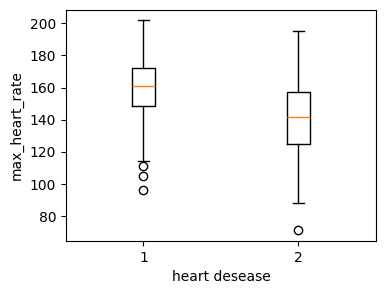

In [15]:
grouped = heart_df.groupby('heart_desease')[feature].apply(list)

print(grouped.index)

fig, ax = plt.subplots(figsize=(4,3))

ax.boxplot(grouped.values, labels = grouped.index)

ax.set_ylabel(feature)
ax.set_xlabel('heart desease')

plt.show()

The above analysis can also be performed for any other chosen feature from the dataset.

## Training a classifier

Finally, we want to use the provided data to _train a classifier_ which will be able to predict the presence or absence of heart desease, given the specified features are measured and recorded from the patient.

### Preparing the dataset

First, we will want to prepare the values in the dataset for classification. This typically means reversing much of the 'human readable' changes we have implemented [earlier](#Preparation) for dataset inspection.

#### Cardinal features

All the _cardinal_ features should be replaced with _indicator_ features. For example, we should "separate" our `thal` features into three features: first indicating whether the patient has a `normal` condition, the second indicating whether they have a `fixed` defect, and the third indicating whether they have a `reversible` effect.

To do this, we can use:
- [`pandas.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) to obtain these individual columns for each value of our categorical feature
- [`pandas.DataFrame.join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) to add these columns into our original [`pandas.DataFrame()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- [`pandas.DataFrame.drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) with the argument `axis = 'columns'` to remove the original feature `thal`

In [16]:
thal_dummies = pd.get_dummies(heart_df.thal)
#display(heart_df.thal.head())
#display(thal_dummies.head())
heart_df = heart_df.join(thal_dummies)
heart_df.drop('thal', axis = 'columns', inplace = True)
#heart_df

We will follow a similar procedure with the `sex` feature. However, since this feature can only have two values in our dataset (`male` and `female`), we do not need both dummy features. Therefore, we use `drop_first=True` in the call to [`pandas.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) (this way, we obtain only a single column for `male`; in this dataset, we can always know if the patient is `female` if they are not `male`).

In [17]:
sex_dummies = pd.get_dummies(heart_df.sex, drop_first=True)
heart_df = heart_df.join(sex_dummies)
heart_df.drop('sex', axis = 'columns', inplace = True)
heart_df

,age,chest_pain_type,resting_blood_pressure,serum_cholesterol,ECG,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,heart_desease,fixed,normal,reversable,male
0,70.0,4,130.0,322.0,2,109.0,0,2.4,2.0,3,2,False,True,False,False
1,67.0,3,115.0,564.0,2,160.0,0,1.6,2.0,0,1,False,False,True,True
2,57.0,2,124.0,261.0,0,141.0,0,0.3,1.0,0,2,False,False,True,False
3,64.0,4,128.0,263.0,0,105.0,1,0.2,2.0,1,1,False,False,True,False
4,74.0,2,120.0,269.0,2,121.0,1,0.2,1.0,1,1,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,3,172.0,199.0,0,162.0,0,0.5,1.0,0,1,False,False,True,False
266,44.0,2,120.0,263.0,0,173.0,0,0.0,1.0,0,1,False,False,True,False
267,56.0,2,140.0,294.0,2,153.0,0,1.3,2.0,0,1,False,True,False,True
268,57.0,4,140.0,192.0,0,148.0,0,0.4,2.0,0,1,True,False,False,False


Again, we follow a similar procedure for `chest pain type`, except we edit the column name to be a bit more descriptive (original column names were just attribute values - 0, 1, 2, 3. We change this to `cpain 0`, `cpain 1`, `cpain 2` and `cpain 3`).

In [18]:
chest_pain_dummies = pd.get_dummies(heart_df['chest_pain_type'])
chest_pain_dummies.columns = ['cpain {}'.format(v) for v in chest_pain_dummies.columns]
#heart_df = heart_df.join(chest_pain_dummies)
heart_df.drop('chest_pain_type', axis='columns', inplace = True)
heart_df

,age,resting_blood_pressure,serum_cholesterol,ECG,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,heart_desease,fixed,normal,reversable,male
0,70.0,130.0,322.0,2,109.0,0,2.4,2.0,3,2,False,True,False,False
1,67.0,115.0,564.0,2,160.0,0,1.6,2.0,0,1,False,False,True,True
2,57.0,124.0,261.0,0,141.0,0,0.3,1.0,0,2,False,False,True,False
3,64.0,128.0,263.0,0,105.0,1,0.2,2.0,1,1,False,False,True,False
4,74.0,120.0,269.0,2,121.0,1,0.2,1.0,1,1,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,172.0,199.0,0,162.0,0,0.5,1.0,0,1,False,False,True,False
266,44.0,120.0,263.0,0,173.0,0,0.0,1.0,0,1,False,False,True,False
267,56.0,140.0,294.0,2,153.0,0,1.3,2.0,0,1,False,True,False,True
268,57.0,140.0,192.0,0,148.0,0,0.4,2.0,0,1,True,False,False,False


The `ECG` feature is treated in the same way, with the column names edited for clarity again.

In [19]:
ECG_dummies = pd.get_dummies(heart_df['ECG'])
ECG_dummies.columns = ['ECG {}'.format(v) for v in ECG_dummies.columns]
heart_df = heart_df.join(ECG_dummies)

heart_df.drop('ECG', axis = 'columns', inplace = True)
heart_df

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,heart_desease,fixed,normal,reversable,male,ECG 0,ECG 1,ECG 2
0,70.0,130.0,322.0,109.0,0,2.4,2.0,3,2,False,True,False,False,False,False,True
1,67.0,115.0,564.0,160.0,0,1.6,2.0,0,1,False,False,True,True,False,False,True
2,57.0,124.0,261.0,141.0,0,0.3,1.0,0,2,False,False,True,False,True,False,False
3,64.0,128.0,263.0,105.0,1,0.2,2.0,1,1,False,False,True,False,True,False,False
4,74.0,120.0,269.0,121.0,1,0.2,1.0,1,1,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,172.0,199.0,162.0,0,0.5,1.0,0,1,False,False,True,False,True,False,False
266,44.0,120.0,263.0,173.0,0,0.0,1.0,0,1,False,False,True,False,True,False,False
267,56.0,140.0,294.0,153.0,0,1.3,2.0,0,1,False,True,False,True,False,False,True
268,57.0,140.0,192.0,148.0,0,0.4,2.0,0,1,True,False,False,False,True,False,False


#### Renaming the classes

The final step in preparing our data for classification is replacing the class indicators with (0, 1). While most classification algorithms would also work with classes (1, 2) (or, in fact, 5, 7, or any two other class labels), "0, 1" is standard.

In [20]:
heart_df['heart_desease'].replace([1, 2], [0, 1], inplace = True)
heart_df

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,exercise_angina,oldpeak,slope_exercise_ST,coloured_vessels,heart_desease,fixed,normal,reversable,male,ECG 0,ECG 1,ECG 2
0,70.0,130.0,322.0,109.0,0,2.4,2.0,3,1,False,True,False,False,False,False,True
1,67.0,115.0,564.0,160.0,0,1.6,2.0,0,0,False,False,True,True,False,False,True
2,57.0,124.0,261.0,141.0,0,0.3,1.0,0,1,False,False,True,False,True,False,False
3,64.0,128.0,263.0,105.0,1,0.2,2.0,1,0,False,False,True,False,True,False,False
4,74.0,120.0,269.0,121.0,1,0.2,1.0,1,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,172.0,199.0,162.0,0,0.5,1.0,0,0,False,False,True,False,True,False,False
266,44.0,120.0,263.0,173.0,0,0.0,1.0,0,0,False,False,True,False,True,False,False
267,56.0,140.0,294.0,153.0,0,1.3,2.0,0,0,False,True,False,True,False,False,True
268,57.0,140.0,192.0,148.0,0,0.4,2.0,0,0,True,False,False,False,True,False,False


### Classification

#### Selecting the data

Finally, we select our data for classification. We store all the features (i.e. patient characteristics we will use for prediction) in `X`, while we store the class labels (indicating presence or absence of heart desease) into `y`.

In [21]:
X = heart_df.drop('heart_desease', axis = 'columns').values
y = heart_df.heart_desease.values
print(X.shape)
print(y.shape)

(270, 15)
(270,)


#### Splitting the data

So that we can gauge the performance of our models, we need to split our dataset into a _training_ and _testing_ part of the dataset. When using `sklearn`, this can be easily achieved by using:
- [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): splits any amount of input arrays into random test and train subsets of the specified size.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Training the classifiers

Finally, we will train two classification models:
- [`ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [`neighbors.KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

We will predict the class for all the samples from the testing set, and display the prediction for the first sample with both models:

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 = RandomForestClassifier(n_estimators = 10, max_depth = 4, random_state = 42)
model2 = KNeighborsClassifier(n_neighbors = 9)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_predicted1 = model1.predict(X_test)
y_predicted2 = model2.predict(X_test)

print("Random Forest prediction for {} is {} while truth is {}".format(X_test[0], y_predicted1[0], y_test[0]))
print("KNeigbors prediction for {} is {} while truth is {}".format(X_test[0], y_predicted2[0], y_test[0]))

Random Forest prediction for [57.0 128.0 229.0 150.0 0 0.4 2.0 1 False False True False False False
 True] is 1 while truth is 1
KNeigbors prediction for [57.0 128.0 229.0 150.0 0 0.4 2.0 1 False False True False False False
 True] is 0 while truth is 1


#### Model evaluation

Finally, we need to evaluate our models (i.e. say how good they perform). For this, we will compare the predictions made by our model to the actual presence or absence of heart desease on the patients of the witheld testing set.

We will use:
- [`metrics.ConfusionMatrixDsiplay()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) and the `.from_estimator()` method, to display the confusion matrix
- [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to calculate the percentage of all correctly classified samples

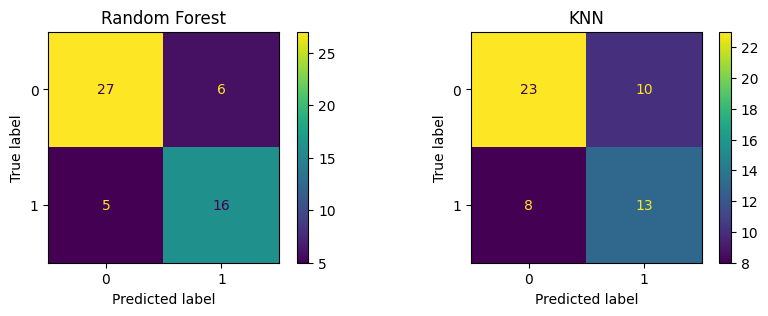

Random Forest accuracy: 0.7962962962962963
KNeigbors accuracy: 0.6666666666666666


In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

fig, axs = plt.subplots(1, 2, figsize = (10, 3))

disp = ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, ax = axs[0])
axs[0].set_title("Random Forest")
disp = ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, ax = axs[1])
axs[1].set_title("KNN")
plt.show()

print("Random Forest accuracy: {}".format(accuracy_score(y_test, model1.predict(X_test))))
print("KNeigbors accuracy: {}".format(accuracy_score(y_test, y_predicted2)))

Looking at accuracy scores, we can see that our random forest based classifier performs better in terms of overall accuracy.

The confusion matrix gives us a more detailed insight and confirms this:
- the KNN classifier is _wrong_ about half of the times it predicts the patient has heart desease (our of 23 predictions of heart desease, 10 were incorrect)
- the KNN also _misses_ more cases of heart desease than the random forest (i.e. 8 cases of heart desease were not detected by KNN, while only 6 were not detected by random forest)

Note that **this is actually a tiny dataset**; suitable for **studying the relationships between the features** and **constructing toy classification models**. However, we would **want to rely on many hundered times more data points if any such model were to be used in practice** (and this is even more true in the case of sensitive medical applications).